In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import csv
import glob
import random
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Preprocessing and Loading

## X-Ray Images for Diagnosing Pneumonia

In [193]:
# save images to a csv file, one row per image
# @param imgDir: directory name of the images
# @param csvpath: name of the csv file to create
# @param number: number of images to save
# @param label: label of the images, 0 for normal, 1 for pneumonia
def imgToCsv(imgDir, csvPath, number, label):
    with open(csvPath, mode='a+') as file:
        writer = csv.writer(file) 
        count = 0
        for currImg in glob.glob(imgDir+'/*.jpeg'):
            img = cv2.imread(currImg)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            img = img.reshape(1, -1)
            imgList = [label]
            for i in range(len(img[0])):
                imgList.append(img[0][i])
            writer.writerow(imgList)
            count += 1
            if count == number:
                break

In [194]:
# clear a csv file
# @param csvPath: name of csv file
def clearCsv(csvPath):
    f = open(csvPath, 'r+')
    f.truncate(0) 
    f.close()

In [195]:
# clearCsv('images.csv')
# imgToCsv('xrays/normal','images.csv',1000,0)
# imgToCsv('xrays/pneumonia','images.csv',1000,1)

In [330]:
data_xrays = pd.read_csv("images.csv",header=None)
data_xrays.shape

(2000, 10001)

### Reduce Dimentionality by PCA

In [331]:
features = data_xrays.iloc[:,1:] #all features
labels = data_xrays.iloc[:,0] #all labels
features = StandardScaler().fit_transform(features) #standarlize all the features

pca = PCA(0.95)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data = principalComponents) #principal components

finalDf = pd.concat([labels, principalDf], axis = 1) #add in the all labels
finalDf.shape

(2000, 510)

Text(0, 0.5, ' total information')

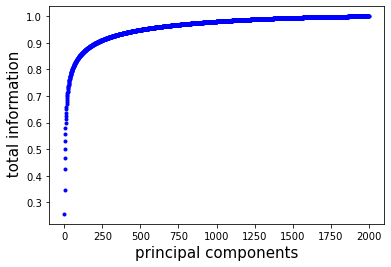

In [198]:
ratio = pca.explained_variance_ratio_ #information(variance) of each of the principal components
variance = 0
count = 0
for value in ratio: #sum the each component's covered information one by one
    variance += value
    count += 1
    plt.scatter(count, variance, c = 'b', marker = '.') #show the trends of total information
plt.xlabel('principal components', fontsize = 15)
plt.ylabel(' total information', fontsize = 15)

In [332]:
scaled_xray = shuffle(finalDf)
scaled_xray

,0,0,1,2,3,4,5,6,7,8,...,499,500,501,502,503,504,505,506,507,508
1859,1,32.809528,51.591048,17.750076,-1.651758,-12.897206,-16.057274,18.834197,-34.341357,6.046015,...,-2.714063,0.848082,0.916619,1.236597,-2.744441,-1.532212,1.484260,2.090942,0.823361,0.727265
1248,1,-31.748874,9.370522,44.719342,12.424628,13.339992,24.026721,-27.018569,18.250789,3.510985,...,-1.315135,-1.127405,-2.859767,-2.524969,1.367420,0.882648,1.637442,0.528011,0.030561,0.439858
1323,1,-27.976773,15.298173,0.804527,22.258803,1.390402,9.777109,24.234045,-15.266563,-6.665646,...,0.949956,0.179552,0.417588,-0.915637,-0.214628,0.839869,-0.540970,-0.996669,0.312856,0.186990
505,0,16.898946,-32.723462,-8.039039,17.423892,-44.172197,16.382946,-21.645251,10.306424,13.703572,...,-1.340536,-1.873267,1.742768,-1.420333,0.003457,-0.826926,-0.742585,-0.533760,-0.556413,-0.821203
1928,1,-34.554196,-2.266589,6.400122,-37.724723,-12.831362,4.435900,-4.794787,-12.547030,-8.067693,...,0.429302,0.984720,0.293612,-0.392352,0.528753,-0.151309,-0.548683,-0.723876,0.066116,1.151904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0,-26.323409,-59.106674,-21.444877,-6.773033,-11.991122,20.852347,-3.624897,-3.976725,12.483739,...,-0.182913,0.687560,0.012847,0.540800,1.204780,0.842929,-0.856220,1.653881,0.192233,1.350601
1964,1,-21.513731,7.692925,-4.754586,-12.996138,-34.847105,17.969097,8.181337,5.611538,-13.514544,...,-1.547125,0.487024,-0.102628,-0.609657,-0.802041,0.251603,-0.286903,0.647795,-1.105130,1.249892
367,0,2.201419,-27.626924,-15.004856,-22.727551,39.092134,7.840349,-11.993669,-12.380946,2.744903,...,0.397204,-0.513525,2.620292,1.349829,3.037314,1.133125,-0.495047,0.918172,0.387026,-0.188775
1143,1,4.521896,15.116584,18.670804,16.880416,-21.313443,-23.291272,21.867383,-9.223685,4.332463,...,1.182276,-0.688589,0.179482,-1.238270,1.035622,0.985162,0.553733,0.128074,0.113801,-0.151583


## League of legends Diamond-Ranked Games 

In [344]:
data_lol = pd.read_csv("high_diamond_ranked_10min.csv",usecols=range(1, 21),nrows=4000)
# data_lol = shuffle(data_lol)
data_lol

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0
1,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2
2,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3
3,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7
4,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,79,3,0,4,7,4,0,0,0,0,16017,6.6,17524,202,55,-1031,-570,20.2,1601.7
3996,1,16,5,0,6,7,4,0,0,0,0,16286,6.8,18048,230,52,-396,795,23.0,1628.6
3997,0,15,5,0,9,8,7,1,0,1,1,19084,6.8,17286,225,38,2445,-81,22.5,1908.4
3998,0,39,1,0,4,12,5,0,0,0,0,14899,6.8,16761,190,36,-5515,-3391,19.0,1489.9


## Titanic Survival

In [3]:
test_titanic = pd.read_csv('titanic/test.csv')
survival_titanic = pd.read_csv('titanic/survivals.csv')
test_titanic.insert(1,"Survived",survival_titanic.iloc[:,1])
train_titanic = pd.read_csv('titanic/train.csv')
data_titanic = train_titanic.append(test_titanic)
data_titanic = data_titanic.drop(["PassengerId","Name","Ticket","Cabin","Embarked","Fare"],axis=1)

In [4]:
for i in range(len(data_titanic)):
    #fill missing 'survived'
    if data_titanic.isnull().iloc[i,0] == True:
        data_titanic.iloc[i,0] = random.sample([0,1],1)
    #fill missing 'pclass'
    if data_titanic.isnull().iloc[i,1] == True:
        data_titanic.iloc[i,1] = random.sample([1,3],1)
    #encode and fill missing 'sex', male=0, female=1   
    if data_titanic.isnull().iloc[i,2] == True:
        data_titanic.iloc[i,2] = random.sample([0,1],1)
    elif data_titanic.iloc[i,2] == "male":
        data_titanic.iloc[i,2] = 0
    else:
        data_titanic.iloc[i,2] = 1
    #fill missing 'age'
    if data_titanic.isnull().iloc[i,3] == True:
        data_titanic.iloc[i,3] = np.mean(data_titanic.iloc[:,3])
    #fill missing 'sibsp'
    if data_titanic.isnull().iloc[i,4] == True:
        data_titanic.iloc[i,4] = np.mean(data_titanic.iloc[:,4])
    #fill missing 'parch'
    if data_titanic.isnull().iloc[i,5] == True:
        data_titanic.iloc[i,5] = np.mean(data_titanic.iloc[:,5])  
data_titanic = shuffle(data_titanic)
data_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch
414,1,1,1,39.000000,0,0
781,1,1,1,17.000000,1,0
227,1,3,1,29.881138,0,0
817,0,2,0,31.000000,1,1
673,1,2,0,31.000000,0,0
...,...,...,...,...,...,...
330,1,2,1,48.000000,0,2
636,0,3,0,32.000000,0,0
619,0,2,0,26.000000,0,0
436,0,3,1,21.000000,2,2


## Handwritten Digits

In [254]:
digits = pd.read_csv('digits/digits.csv', header=None, nrows=5000)
labels = pd.read_csv('digits/digit_labels.csv', header=None, nrows=5000)
data_digits = pd.concat([labels,digits],axis=1)

In [255]:
#positive class if number larger than 4, negative class elsewise
for i in range(len(data_digits)):
    if data_digits.iloc[i,0] > 4:
        data_digits.iloc[i,0] = 1
    else:
        data_digits.iloc[i,0] = 0
        
data_digits.shape

(5000, 785)

### Reduce dimensionality by PCA

In [256]:
digit_features = data_digits.loc[:,1:data_digits.shape[1]] #all features
digit_labels = data_digits.loc[:,0] #all labels
features = StandardScaler().fit_transform(digit_features) #standarlize all the features

pca = PCA(0.95)
principals = pca.fit_transform(features)
principal_features = pd.DataFrame(data=principals) #principal components

scaled_digit = pd.concat([digit_labels, principal_features], axis=1) #add in the all labels
scaled_digit = shuffle(scaled_digit)
scaled_digit

,0,0,0,1,2,3,4,5,6,7,...,285,286,287,288,289,290,291,292,293,294
4421,0,0,-6.577951,1.309502,-0.592207,-2.537191,-1.880663,4.250554,-1.581999,1.896776,...,0.301893,-0.060449,-0.629605,-0.075077,-0.036413,0.049146,-0.140891,0.545806,0.167566,-0.379057
3370,0,0,0.569020,-3.252012,3.554670,-1.152000,-3.995983,1.738243,5.118033,-0.347796,...,-1.216875,0.933588,-1.047566,-0.284210,0.141907,0.029122,-0.323324,0.506091,-0.245030,-0.001891
4400,0,0,24.388812,-1.389858,7.991659,-1.315042,-8.359746,9.392153,-1.817456,2.094879,...,0.561805,0.011929,-0.662030,-0.345584,-1.156905,0.011445,-0.692136,0.116407,-0.160814,-0.087739
1192,0,0,-4.809667,-0.005295,-4.486081,-1.140986,0.547100,-1.179988,-3.262404,-5.602384,...,-0.670760,0.132684,-0.233838,-0.234987,0.512066,0.262984,0.250890,-0.808647,-0.752543,-0.052271
1007,1,0,1.881712,-2.134550,-0.856813,7.159341,-3.549358,-1.167619,5.962929,3.025292,...,-0.391122,0.027529,0.059900,0.331581,0.261253,-0.260005,0.438197,-0.077664,0.133628,-0.543962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,0,-3.440750,-1.721359,-3.649412,-2.732290,-1.940611,-2.377413,2.675293,0.857982,...,0.032579,-1.062022,0.344603,1.834159,3.957723,-1.232694,1.942451,2.383795,1.431359,1.004808
936,1,0,-6.197656,-0.977919,-1.502118,0.634370,-4.777040,-0.279235,-2.402603,-1.614868,...,1.146939,1.096777,-0.731418,0.624329,-1.315412,1.125421,0.288066,-1.933372,0.115240,1.074911
2511,0,0,-7.028797,1.964237,-1.574435,-3.102598,-1.710164,5.176493,-1.967640,3.360274,...,-0.584159,0.459384,1.079297,0.336069,-0.111548,0.368471,0.178026,-0.358374,-0.298065,0.330759
570,0,0,17.585667,-8.573820,4.920882,-5.960077,-3.883580,4.972832,0.969818,-2.341776,...,0.459340,-0.221925,0.282905,0.113167,-0.458430,0.308982,-0.694440,0.181073,0.304462,0.226978


## Stander Scale the 4 datasets

In [334]:
# x-ray dataset has already been scaled by PCA
scaled_xray.shape

(2000, 510)

In [345]:
# scale LoL
scaler = StandardScaler()
scaled_lol = scaler.fit_transform(data_lol.iloc[:,1:])
scaled_lol = np.hstack([np.array(data_lol.iloc[:,0]).reshape(-1,1),scaled_lol])
scaled_lol = pd.DataFrame(scaled_lol)
scaled_lol = shuffle(scaled_lol)
scaled_lol.shape

(4000, 20)

In [207]:
# scale titanic
scaler = StandardScaler()
scaled_titanic = scaler.fit_transform(data_titanic.iloc[:,1:])
scaled_titanic = np.hstack([np.array(data_titanic.iloc[:,0]).reshape(-1,1),scaled_titanic])
scaled_titanic = pd.DataFrame(scaled_titanic)
scaled_titanic.shape

(1309, 6)

In [257]:
# digits dataset has already been scaled by PCA
scaled_digit.shape

(5000, 297)

# Logistic Regression

In [301]:
def lr_metrics(dataset):
    model_metrics = [] #store list of metrics from each trial
    
    #set up parameters and classifier for grid search
    C_list = [1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1000,10000]
    parameters = {'C':C_list}
    classifier = LogisticRegression(solver='liblinear',max_iter=500)
    search = GridSearchCV(classifier,parameters,cv=5)
    
    # 5 trials 
    for trials in range(0,5):
        #random select trainning and test samples 
        x_train,x_test,y_train,y_test = train_test_split(dataset.iloc[:,1:],dataset.iloc[:,0],test_size=0.3,random_state=trials)
        
        #search for the best hyperparameter
        search.fit(x_train,y_train)
        # find the optimal classifier with optimal hyperparameter
        opt_classifier = search.best_estimator_
        #train using the best classifier
        opt_classifier.fit(x_train,y_train)

        # test and make predictions
        y_pred = opt_classifier.predict(x_test)
        y_proba = opt_classifier.predict_proba(x_test)
        #calculate performance metrics
        Accuracy = metrics.balanced_accuracy_score(y_test,y_pred)
        F1 = metrics.f1_score(y_test,y_pred)
        AUC = metrics.roc_auc_score(y_test,y_proba[:,1])
        MCC = metrics.matthews_corrcoef(y_test,y_pred)
        model_metrics.append([Accuracy,F1,AUC,MCC]) # store the metrics list after each trial

    # average each metrics over trials
    metrics_avg = []
    for i in range(np.array(model_metrics).shape[1]):
        metrics_avg.append(np.mean(np.array(model_metrics)[:,i]))
        
    return metrics_avg # return list of averaged metrics

In [346]:
# lr_xray_metrics = lr_metrics(scaled_xray)
# lr_lol_metrics = lr_metrics(scaled_lol)
# lr_titanic_metrics = lr_metrics(scaled_titanic)
# lr_digit_metrics = lr_metrics(scaled_digit)

In [347]:
print('xray:', lr_xray_metrics)
print('lol:', lr_lol_metrics)
print('titanic:', lr_titanic_metrics)
print('digit:', lr_digit_metrics)

xray: [0.9436243053597788, 0.9426597399205479, 0.98721507033428, 0.8874115327392182]
lol: [0.7287850930548375, 0.7235174524211003, 0.8102129589738372, 0.458014701071708]
titanic: [0.8411176376077281, 0.8074644301054255, 0.8929052107666635, 0.6924302443821977]
digit: [0.9346170509151166, 0.9346982377291955, 0.9772192488939446, 0.8690849191569573]


In [337]:
lr_list = [lr_xray_metrics, lr_lol_metrics, lr_titanic_metrics, lr_digit_metrics]
lr_by_metrics = [] #metrics scroes of LR, avg over 4problems
lr_by_problems = [] #metrics scores of LR, avg over 4 metrics
# avg over 4 problems
for i in range(np.array(lr_list).shape[1]):
    lr_by_metrics.append(np.mean(np.array(lr_list)[:,i]))
# avg over 4 metrics
for i in range(np.array(lr_list).shape[0]):
    lr_by_problems.append(np.mean(np.array(lr_list)[i,:]))

print('LR scores by metrics:', lr_by_metrics) 
print('LR scores by problems:', lr_by_problems)

LR scores by metrics: [0.8621931310265389, 0.8519518140248984, 0.9149947665342177, 0.7269973041552455]
LR scores by problems: [0.9402276620884562, 0.6785251087631371, 0.8084793807155037, 0.9289048641738035]


# Support Vector Machine

In [310]:
# culculat 4 metrics,'accuracy','f1','auc','mcc', for specific classifier and problem
# @param dataset is the scaled dataset, 1 column should be label
def svm_metrics(dataset):
    
    model_metrics = [] #store list of metrics from each trial
    
    # set parameters for grid search
    C_list = [1e-1,1,10,100,1000]
    gamma_list = [1e-5, 1e-4, 1e-3,1e-2,1e-1]
    parameters = {'C':C_list, 'gamma':gamma_list}
    classifier = svm.SVC(kernel='rbf',probability=True) # classifier
    
    # 5 trials on the given classifier and parameters
    for trials in range(0,5):
        #random select trainning samples
        x_train,x_test,y_train,y_test = train_test_split(dataset.iloc[:,1:],dataset.iloc[:,0],test_size=0.3,random_state=trials)
            
        # search for the best hyperparameter
        search = GridSearchCV(classifier,parameters,cv=5)
        search.fit(x_train,y_train)
        opt_classifier = search.best_estimator_ # the optimal classifier
        #train using the best classifier
        opt_classifier.fit(x_train,y_train)

        # test and make predictions
        y_pred = opt_classifier.predict(x_test)
        y_proba = opt_classifier.predict_proba(x_test)
        #calculate performance metrics
        Accuracy = metrics.balanced_accuracy_score(y_test,y_pred)
        F1 = metrics.f1_score(y_test,y_pred)
        AUC = metrics.roc_auc_score(y_test,y_proba[:,1])
        MCC = metrics.matthews_corrcoef(y_test,y_pred)
        model_metrics.append([Accuracy,F1,AUC,MCC]) # store the metrics list after each trial

    # average each metrics over trials
    metrics_avg = []
    for i in range(np.array(model_metrics).shape[1]):
        metrics_avg.append(np.mean(np.array(model_metrics)[:,i]))
        
    return metrics_avg # return list of averaged metrics

In [341]:
# svm_xray_metrics = svm_metrics(scaled_xray)
# svm_lol_metrics = svm_metrics(scaled_lol)
# svm_titanic_metrics = svm_metrics(scaled_titanic)
# svm_digit_metrics = svm_metrics(scaled_digit)

In [342]:
print('xray:', svm_xray_metrics)
print('lol:', svm_lol_metrics)
print('titanic:', svm_titanic_metrics)
print('digit:', svm_digit_metrics)

xray: [0.9613252488924804, 0.9605768464238711, 0.9956585548214851, 0.9226883926468998]
lol: [0.7257352025417694, 0.7175432181281834, 0.8004689753763742, 0.4518469580782648]
titanic: [0.8487104388196677, 0.8174804641161941, 0.8875184225835065, 0.7086557624335728]
digit: [0.9741710580700895, 0.974068399827285, 0.9963154700590475, 0.9483584333111335]


In [343]:
svm_list = [svm_xray_metrics, svm_lol_metrics, svm_titanic_metrics, svm_digit_metrics]
svm_by_metrics = [] #metrics scroes of LR, avg over 4problems
svm_by_problems = [] #metrics scores of LR, avg over 4 metrics
# avg over 4 problems
for i in range(np.array(svm_list).shape[1]):
    svm_by_metrics.append(np.mean(np.array(svm_list)[:,i]))
# avg over 4 metrics
for i in range(np.array(svm_list).shape[0]):
    svm_by_problems.append(np.mean(np.array(svm_list)[i,:]))

print('SVM scores by metrics:', svm_by_metrics) 
print('SVM scores by problems:', svm_by_problems)

SVM scores by metrics: [0.8774854870810018, 0.8674172321238834, 0.9199903557101032, 0.7578873866174678]
SVM scores by problems: [0.9600622606961842, 0.673898588531148, 0.8155912719882352, 0.9732283403168889]


# KNN

In [306]:
# culculat 4 metrics,'accuracy','f1','auc','mcc', for specific classifier and problem
# @param dataset is the scaled dataset, 1 column should be label
def knn_metrics(dataset):
    
    model_metrics = [] #store list of metrics from each trial
    
    # set parameters for grid search
    n_list = [5,10,50,100,200,300,400]
    parameters = {'n_neighbors':n_list}
    classifier = KNeighborsClassifier() # classifier
    
    # 5 trials on the given classifier and parameters
    for trials in range(0,5):
        #random select trainning test samples
        x_train,x_test,y_train,y_test = train_test_split(dataset.iloc[:,1:],dataset.iloc[:,0],test_size=0.3,random_state=trials)
            
        # search for the best hyperparameter
        search = GridSearchCV(classifier,parameters,cv=5)
        search.fit(x_train,y_train)
        opt_classifier = search.best_estimator_ # the optimal classifier
        #train using the best classifier
        opt_classifier.fit(x_train,y_train)

        # test and make predictions
        y_pred = opt_classifier.predict(x_test)
        y_proba = opt_classifier.predict_proba(x_test)
        #calculate performance metrics
        Accuracy = metrics.balanced_accuracy_score(y_test,y_pred)
        F1 = metrics.f1_score(y_test,y_pred)
        AUC = metrics.roc_auc_score(y_test,y_proba[:,1])
        MCC = metrics.matthews_corrcoef(y_test,y_pred)
        model_metrics.append([Accuracy,F1,AUC,MCC]) # store the metrics list after each trial
        
    # average each metrics over trials
    metrics_avg = []
    for i in range(np.array(model_metrics).shape[1]):
        metrics_avg.append(np.mean(np.array(model_metrics)[:,i]))
        
    return metrics_avg # return list of averaged metrics

In [338]:
# knn_xray_metrics = knn_metrics(scaled_xray)
# knn_lol_metrics = knn_metrics(scaled_lol)
# knn_titanic_metrics = knn_metrics(scaled_titanic)
# knn_digit_metrics = knn_metrics(scaled_digit)

In [339]:
print('xray:',knn_xray_metrics)
print('lol:',knn_lol_metrics)
print('titanic:',knn_titanic_metrics)
print('digit:',knn_digit_metrics)

xray: [0.9284479883091665, 0.9283948293858663, 0.9793581624245217, 0.8579316938346541]
lol: [0.7174365932627603, 0.7068427092093291, 0.7927121016058634, 0.4355504488839916]
titanic: [0.8484168794088823, 0.8167588859578483, 0.887949567768844, 0.7083315889840498]
digit: [0.9694673308419433, 0.9695204817904701, 0.9922581738798476, 0.9388694665453088]


In [340]:
knn_list = [knn_xray_metrics, knn_lol_metrics, knn_titanic_metrics, knn_digit_metrics]
knn_by_metrics = [] #metrics scroes of LR, avg over 4problems
knn_by_problems = [] #metrics scores of LR, avg over 4 metrics
# avg over 4 problems
for i in range(np.array(knn_list).shape[1]):
    knn_by_metrics.append(np.mean(np.array(knn_list)[:,i]))
# avg over 4 metrics
for i in range(np.array(knn_list).shape[0]):
    knn_by_problems.append(np.mean(np.array(knn_list)[i,:]))

print('KNN scores by metrics:', knn_by_metrics) 
print('KNN scores by problems:', knn_by_problems)

KNN scores by metrics: [0.865942197955688, 0.8553792265858784, 0.9130695014197691, 0.7351707995620009]
KNN scores by problems: [0.9235331684885522, 0.663135463240486, 0.8153642305299061, 0.9675288632643924]
